In [1]:
from pathlib import Path

import pandas as pd

protcode = "RAS"
ref_path = Path(f"../data/{protcode}_ref.csv")
ref_meta = pd.read_csv(ref_path)

ref_pdbs = [path
            for entry, asym in
            zip(list(ref_meta["Entry ID"]), list(ref_meta["Auth Asym ID"]))
            if (path := Path(f"../data/{protcode}/processed/{entry}_{asym}.pdb")).exists()]

fm_pdbs = list(Path(f"../data/{protcode}/generated/B").glob("FM_*.pdb"))
sm_pdbs = list(Path(f"../data/{protcode}/generated/B").glob("SM_*.pdb"))

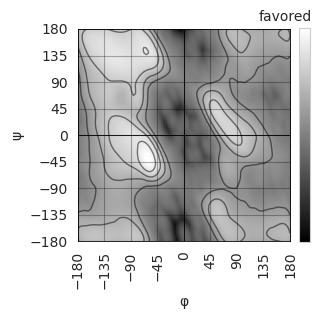

In [2]:
from src.ramachandran import ramachandran_canvas, ramachandran_pdbs
from matplotlib import pyplot as plt
import src.colorscheme as color

fig, ax = plt.subplots(figsize=(3, 3))
ramachandran_canvas(ax, bg_alpha=1, bg_cmap="gray")
plt.show()

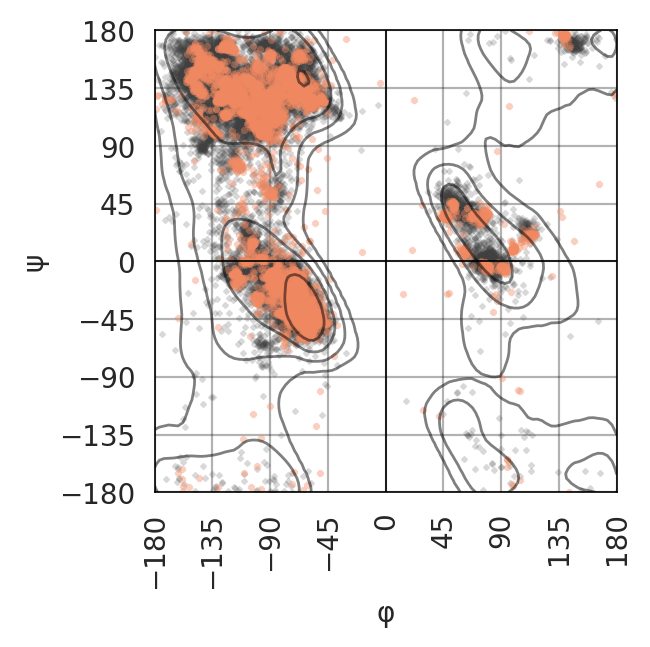

In [3]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
ramachandran_canvas(ax, bg_cmap=None)
ramachandran_pdbs(
    ref_pdbs,
    ax,
    dot_alpha=0.2,
    dot_color=color.CS_BG_DARK,
)
ramachandran_pdbs(
    sm_pdbs,
    ax,
    dot_size=3,
    dot_alpha=0.4,
    dot_color=color.CS_FG_A
)
plt.title("")
plt.show()

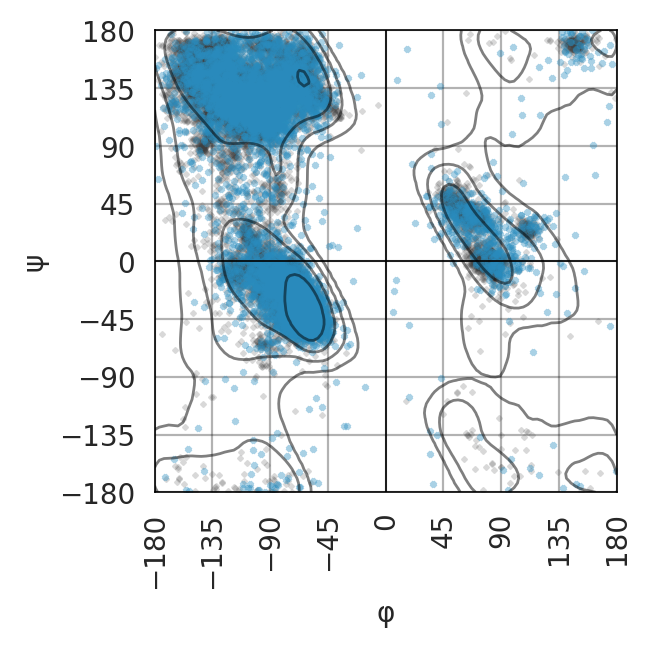

In [4]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
ramachandran_canvas(ax, bg_cmap=None)
ramachandran_pdbs(
    ref_pdbs,
    ax,
    dot_alpha=0.2,
    dot_color=color.CS_BG_DARK,
)
ramachandran_pdbs(
    fm_pdbs,
    ax,
    dot_size=3,
    dot_alpha=0.4,
    dot_color=color.CS_FG_B
)
plt.title("")
plt.show()

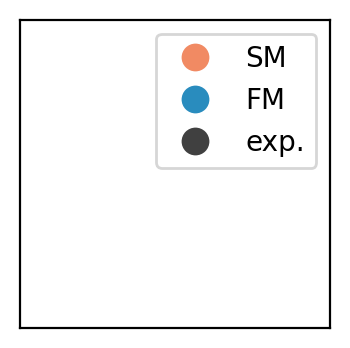

In [20]:
from matplotlib.lines import Line2D

# Legends
fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
plt.legend(
    handles=[
        Line2D([0], [0], 
               label="SM", marker="o", markerfacecolor=color.CS_FG_A,
               markeredgewidth=0, markersize=10, linestyle=""),
        Line2D([0], [0], 
               label="FM", marker="o", markerfacecolor=color.CS_FG_B,
               markeredgewidth=0, markersize=10, linestyle=""),
        Line2D([0], [0], 
               label="exp.", marker="o", markerfacecolor=color.CS_BG_DARK,
               markeredgewidth=0, markersize=10, linestyle=""),
    ],
    # loc='lower right',
    # bbox_to_anchor=(1.28, 0)
)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()